In [14]:
from qiskit import *
from qiskit.visualization import *
from qiskit.circuit.library import *
from qiskit.quantum_info import *

In [15]:
qc1 = QuantumCircuit(5)
qc1.draw()

q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     
q_4:

In [3]:
s1 = Statevector.from_label('11011')
cir1 = Diagonal((-1)**s1.data)
s2 = Statevector.from_label('11001')
cir2 = Diagonal((-1)**s2.data)
s3 = Statevector.from_label('11110')
cir3 = Diagonal((-1)**s3.data)
s4 = Statevector.from_label('11010')
cir4 = Diagonal((-1)**s4.data)
s5 = Statevector.from_label('11000')
cir5 = Diagonal((-1)**s5.data)
qc1.append(cir1, [0,1,2,3,4])
qc1.append(cir2, [0,1,2,3,4])
qc1.append(cir3, [0,1,2,3,4])
qc1.append(cir4, [0,1,2,3,4])

In [4]:
qc1.append(cir5, [0,1,2,3,4])
qc1.draw()

┌───────────┐┌───────────┐┌───────────┐┌───────────┐┌───────────┐
q_0: ┤0          ├┤0          ├┤0          ├┤0          ├┤0          ├
     │           ││           ││           ││           ││           │
q_1: ┤1          ├┤1          ├┤1          ├┤1          ├┤1          ├
     │           ││           ││           ││           ││           │
q_2: ┤2 Diagonal ├┤2 Diagonal ├┤2 Diagonal ├┤2 Diagonal ├┤2 Diagonal ├
     │           ││           ││           ││           ││           │
q_3: ┤3          ├┤3          ├┤3          ├┤3          ├┤3          ├
     │           ││           ││           ││           ││           │
q_4: ┤4          ├┤4          ├┤4          ├┤4          ├┤4          ├
     └───────────┘└───────────┘└───────────┘└───────────┘└───────────┘

In [6]:
qc2 = QuantumCircuit(5)
qc2.draw()

q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     
q_4:

In [7]:
qc2.h([0,1,2,3,4])
qc2.x([0,1,2,3,4])
istate = Statevector.from_label('11111')
istate = Diagonal((-1)**istate.data)
qc2.append(istate, [0,1,2,3,4])
qc2.x([0,1,2,3,4])
qc2.h([0,1,2,3,4])

In [9]:
qc2.draw()

┌───┐┌───┐┌───────────┐┌───┐┌───┐
q_0: ┤ H ├┤ X ├┤0          ├┤ X ├┤ H ├
     ├───┤├───┤│           │├───┤├───┤
q_1: ┤ H ├┤ X ├┤1          ├┤ X ├┤ H ├
     ├───┤├───┤│           │├───┤├───┤
q_2: ┤ H ├┤ X ├┤2 Diagonal ├┤ X ├┤ H ├
     ├───┤├───┤│           │├───┤├───┤
q_3: ┤ H ├┤ X ├┤3          ├┤ X ├┤ H ├
     ├───┤├───┤│           │├───┤├───┤
q_4: ┤ H ├┤ X ├┤4          ├┤ X ├┤ H ├
     └───┘└───┘└───────────┘└───┘└───┘

In [11]:
qc = QuantumCircuit(5,5)
qc.h([0,1,2,3,4])
for i in range(2):
    qc.append(qc1,[0,1,2,3,4])
    qc.append(qc2,[0,1,2,3,4])
qc.draw()

┌───┐┌────────────┐┌─────────────┐┌────────────┐┌─────────────┐
q_0: ┤ H ├┤0           ├┤0            ├┤0           ├┤0            ├
     ├───┤│            ││             ││            ││             │
q_1: ┤ H ├┤1           ├┤1            ├┤1           ├┤1            ├
     ├───┤│            ││             ││            ││             │
q_2: ┤ H ├┤2 circuit-0 ├┤2 circuit-21 ├┤2 circuit-0 ├┤2 circuit-21 ├
     ├───┤│            ││             ││            ││             │
q_3: ┤ H ├┤3           ├┤3            ├┤3           ├┤3            ├
     ├───┤│            ││             ││            ││             │
q_4: ┤ H ├┤4           ├┤4            ├┤4           ├┤4            ├
     └───┘└────────────┘└─────────────┘└────────────┘└─────────────┘
c: 5/═══════════════════════════════════════════════════════════════

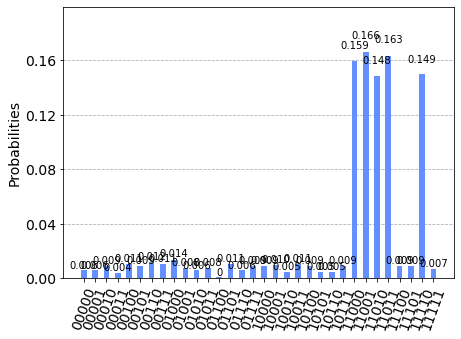

In [13]:
qc.measure([0,1,2,3,4],[0,1,2,3,4])
backend = Aer.get_backend('aer_simulator')
circuit = transpile(qc, backend)
qobj = assemble(circuit)
results = backend.run(qobj,iterations = 2).result()
counts = results.get_counts()
plot_histogram(counts)